# Setup

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [55]:
df = pd.read_csv("train.csv")

# Problem 1 : Predicting SalePrice using GrLivArea

In [56]:
linreg = LinearRegression()

In [72]:
X = pd.DataFrame(df["GrLivArea"])
y = pd.DataFrame(df["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [73]:
# Get size of training and test data
print(f"Size of training data (X): \t{len(X_train)}")
print(f"Size of training data (y): \t{len(y_train)}")
print(f"Size of test data (X): \t\t{len(X_test)}")
print(f"Size of test data (y): \t\t{len(y_test)}")

Size of training data (X): 	1168
Size of training data (y): 	1168
Size of test data (X): 		292
Size of test data (y): 		292


Intercept of Regression 	: b =  24899.74815733786
Coefficients of Regression 	: a =  102.48895891672353



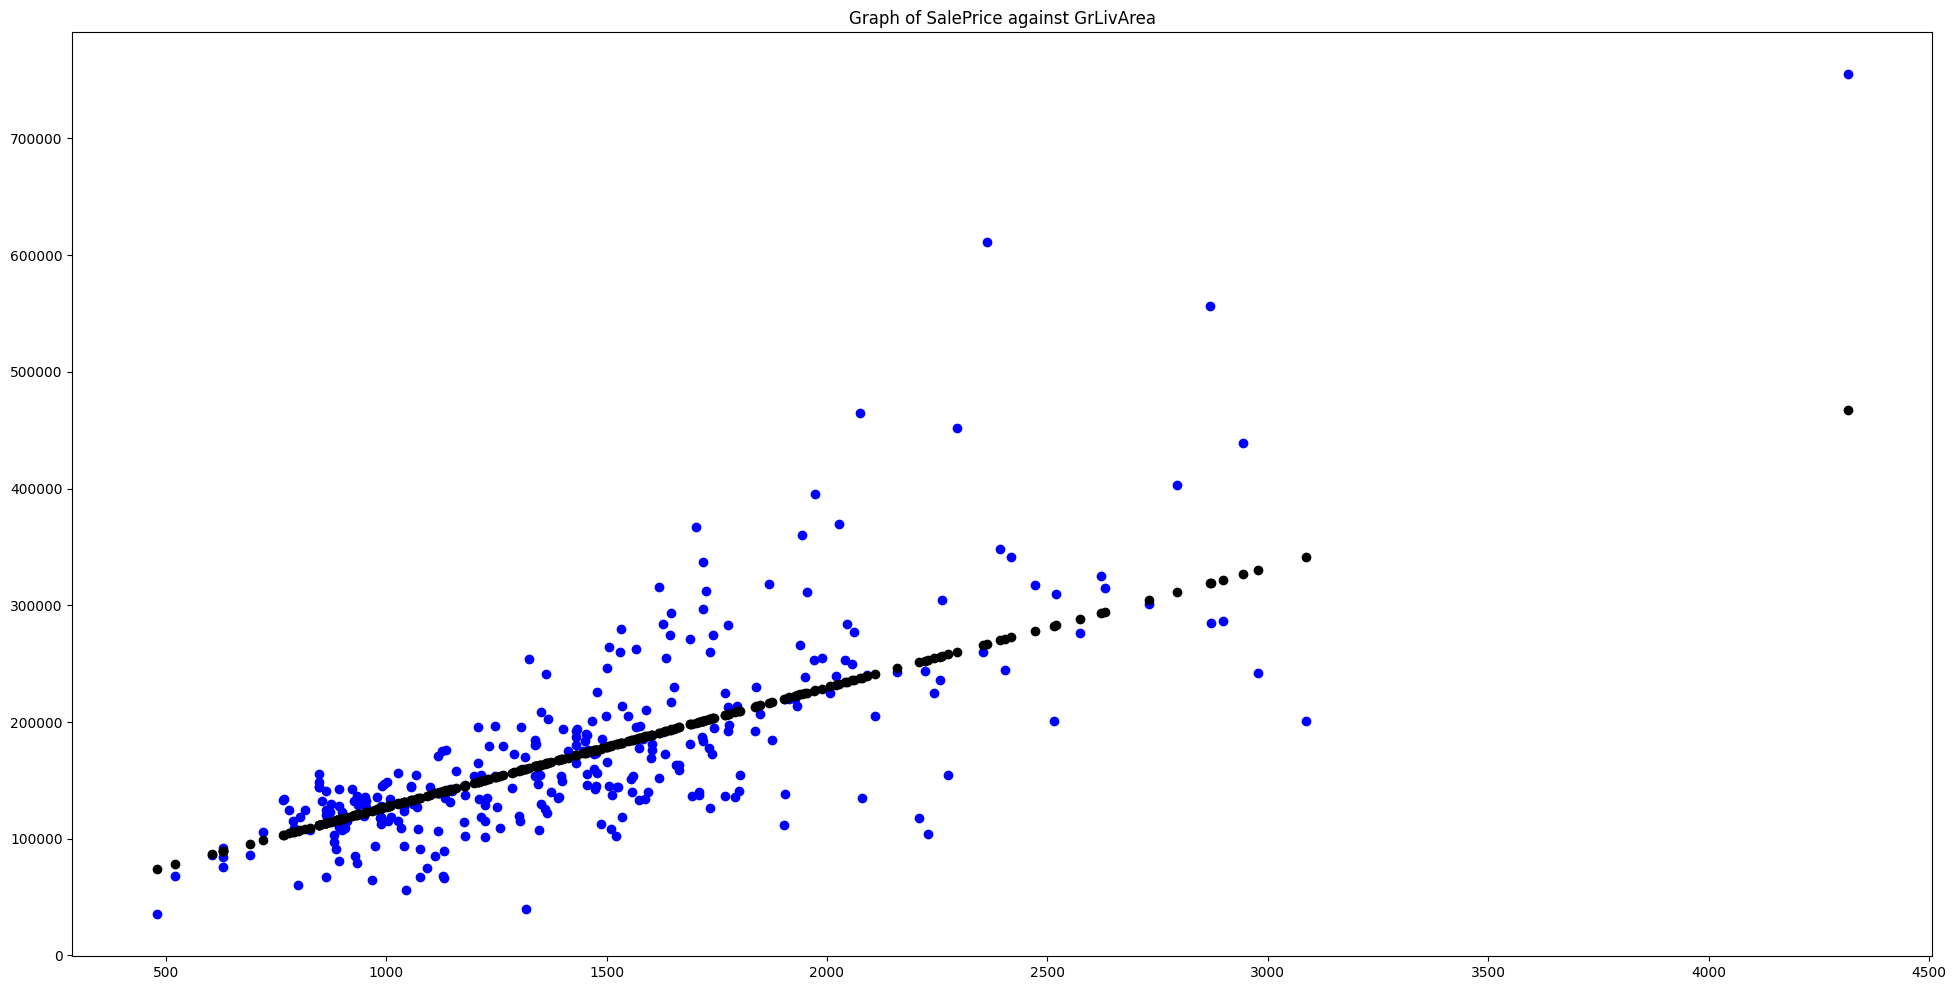

In [75]:
linreg.fit(X_train, y_train)  

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_[0])
print('Coefficients of Regression \t: a = ', linreg.coef_[0][0])
print()

x = np.linspace(0,5000)
y = linreg.coef_[0] * x + linreg.intercept_
# Plot the Regression line
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(X_test, y_test, color = "blue")
axes.scatter(X_test, y_test_pred, linewidth = 1, color="black")
plt.title('Graph of SalePrice against GrLivArea')
plt.show()

In [76]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of the model")
print("(Train) Explained Variance (R^2):", linreg.score(X_train, y_train))
print("(Test) Explained Variance (R^2):", linreg.score(X_test, y_test))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of the model")
print("(Train) Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print("(Test) Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of the model
(Train) Explained Variance (R^2): 0.4839315861430349
(Test) Explained Variance (R^2): 0.5542632452871119

Prediction Accuracy of the model
(Train) Mean Squared Error (MSE): 3078116053.8581204
(Test) Mean Squared Error (MSE): 3418946311.1808047



# Problem 2 : Predicting SalePrice using Other Variables

In [77]:
def regression(var):
  linreg = LinearRegression()
  X = pd.DataFrame(df[var])
  y = pd.DataFrame(df["SalePrice"])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
  linreg.fit(X_train, y_train)        # train the linear regression model
  # Predict Total values corresponding to HP
  y_train_pred = linreg.predict(X_train)
  y_test_pred = linreg.predict(X_test)

  print(f"Regression for {var}")
  print("Goodness of Fit of the model")
  print("(Train) Explained Variance (R^2):", linreg.score(X_train, y_train))
  print("(Test) Explained Variance (R^2):", linreg.score(X_test, y_test))
  print()

  print("Prediction Accuracy of the model")
  print("(Train) Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
  print("(Test) Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
  print()

regression("TotalBsmtSF")
print("---------------------------")
regression("GarageArea")
print("---------------------------")
print("Mean of SalePrice:",df["SalePrice"].mean())
print("Square of Mean of SalePrice:",df["SalePrice"].mean() ** 2)

Regression for TotalBsmtSF
Goodness of Fit of the model
(Train) Explained Variance (R^2): 0.3566499394711763
(Test) Explained Variance (R^2): 0.4662116801398878

Prediction Accuracy of the model
(Train) Mean Squared Error (MSE): 4185000445.3130183
(Test) Mean Squared Error (MSE): 2928135519.565338

---------------------------
Regression for GarageArea
Goodness of Fit of the model
(Train) Explained Variance (R^2): 0.3928336028382845
(Test) Explained Variance (R^2): 0.3732356798658252

Prediction Accuracy of the model
(Train) Mean Squared Error (MSE): 3738326910.930469
(Test) Mean Squared Error (MSE): 4327079493.333758

---------------------------
Mean of SalePrice: 180921.19589041095
Square of Mean of SalePrice: 32732479122.41645


The MSE is too large to be accurate. The R^2 tells us how well a model can predict the value of the response variable in **percentage** terms, while the MSE tells us how well a model can predict the value of the repsonse variable in **absolute** terms. In this case, it is difficult to make sense of the MSE value without any comparison to the SalePrice value, and hence R^2 could be more appropriate to determine the accuracy of the models.

Comparing the values of MSE to SalePrice, the MSE of the 3 models do seem to be relatively large as compared to the absolute value of SalePrice as well.

The model for predicting SalePrice using GrLivArea is the best. Amongst the three models, the Goodness of Fit of the model for the GrLivArea model is the highest (Highest Explained Variance R^2 of 0.5542632452871119 on the Test set), while the Prediction Accuracy of the model on the Test set is the highest as well (Lowest Mean Squared Error MSE of 3418946311.1808047).

# Problem 3 : Refining the Models to Predict SalePrice

In [78]:
GrLivArea = df['GrLivArea']
GrLivArea_Q1 = GrLivArea.quantile(0.25)
GrLivArea_Q3 = GrLivArea.quantile(0.75)
GrLivArea_IQR = GrLivArea_Q3 - GrLivArea_Q1

SalePrice = df['SalePrice']
SalePrice_Q1 = SalePrice.quantile(0.25)
SalePrice_Q3 = SalePrice.quantile(0.75)
SalePrice_IQR = SalePrice_Q3 - SalePrice_Q1

outliers = (df["GrLivArea"] > GrLivArea_Q3 + 1.5 * GrLivArea_IQR) | (df["GrLivArea"] < GrLivArea_Q1 - 1.5 * GrLivArea_IQR) | (df["SalePrice"] > SalePrice_Q3 + 1.5 * SalePrice_IQR) | (df["SalePrice"] < SalePrice_Q1 - 1.5 * SalePrice_IQR)
outliers_indexes = outliers[outliers == True].index
print(f"Outlier Row Indices: {outliers_indexes.tolist()}")
print(f"Total Number of Outliers: {len(outliers_indexes)}")

Outlier Row Indices: [11, 53, 58, 112, 118, 151, 161, 178, 185, 197, 224, 231, 278, 304, 309, 313, 320, 321, 324, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 523, 527, 583, 585, 591, 608, 635, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 961, 987, 990, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1181, 1182, 1228, 1243, 1267, 1268, 1298, 1312, 1328, 1353, 1373, 1386, 1388, 1437]
Total Number of Outliers: 77


In [79]:
# Visualising outliers in dataframe
df[outliers]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500


<AxesSubplot:xlabel='GrLivArea'>

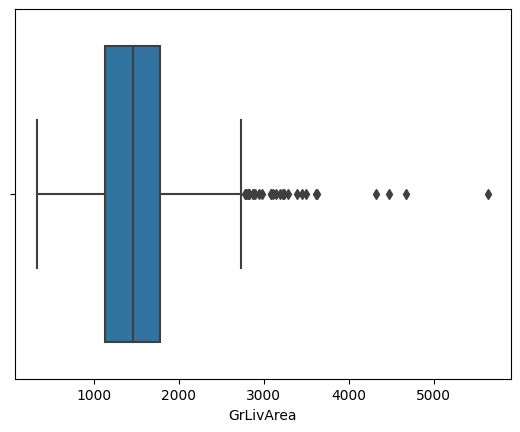

In [80]:
# Visualising outliers in plot for GrLivArea
sns.boxplot(df, x='GrLivArea')

<AxesSubplot:xlabel='SalePrice'>

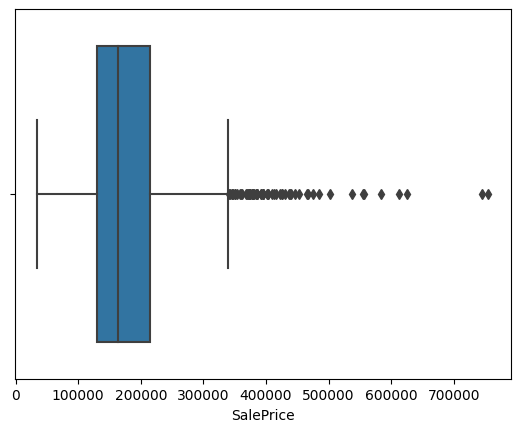

In [81]:
# Visualising outliers in plot for GrLivArea
sns.boxplot(df, x='SalePrice')

In [82]:
# Removing the outliers
problem3_df = df.drop(outliers_indexes)

print("Size of dataframe before removal:\t", len(df))
print("Size of dataframe after removal:\t", len(problem3_df))

Size of dataframe before removal:	 1460
Size of dataframe after removal:	 1383


Intercept of Regression 	: b =  35075.00268145537
Coefficients of Regression 	: a =  91.4685580414278



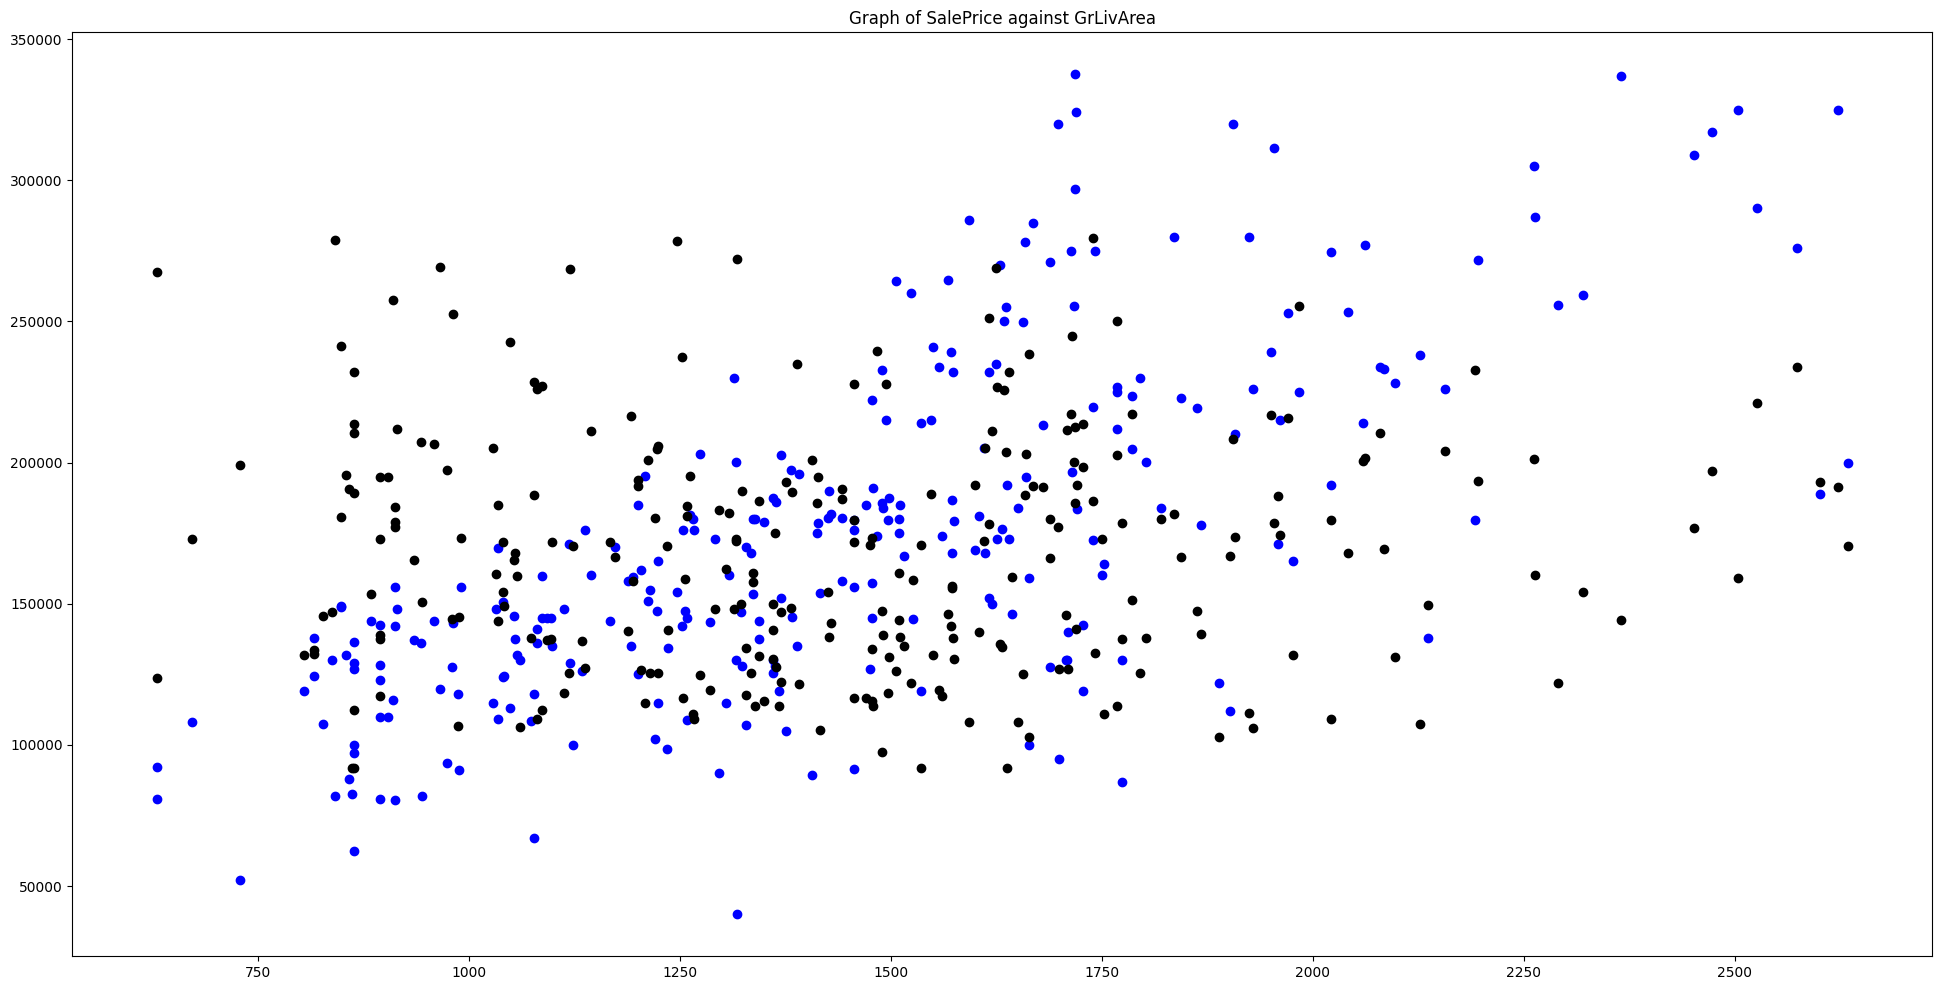

In [71]:
linreg = LinearRegression()

X = pd.DataFrame(problem3_df["GrLivArea"])
y = pd.DataFrame(problem3_df["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Training the linear regression model
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_[0])
print('Coefficients of Regression \t: a = ', linreg.coef_[0][0])
print()

x = np.linspace(0,5000)
y = linreg.coef_[0] * x + linreg.intercept_
# Plot the Regression line
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(X_test, y_test, color = "blue")
axes.scatter(X_test, y_test_pred, color = "black")
# axes.plot(x, y, linewidth = 1, color="black")
plt.title('Graph of SalePrice against GrLivArea')
plt.show()

In [66]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of the model")
print("(Train) Explained Variance (R^2):", linreg.score(X_train, y_train))
print("(Test) Explained Variance (R^2):", linreg.score(X_test, y_test))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of the model")
print("(Train) Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print("(Test) Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of the model
(Train) Explained Variance (R^2): 0.4649331264429736
(Test) Explained Variance (R^2): 0.5300058850175878

Prediction Accuracy of the model
(Train) Mean Squared Error (MSE): 1867348534.4372976
(Test) Mean Squared Error (MSE): 1528812763.359592



The model from Problem 3 is better than the model from Problem 1. The Prediction Accuracy of the model in Problem 3 is significantly better than that of Problem 1 (MSE of 1528812763.359592 vs 3418946311.1808047), while the Goodness of Fit of the models on the Train set are relatively similar for both models (Explained Variance R^2 of 0.4649331264429736 vs 0.4839315861430349)